### Predictive analysis (classification)
Build a ML pipeline to determine if the first stage of Falcon 9 will land successufully. 
* Split data into training and test datasets
* Train different classification models
* Hyperparameter grid search
* Build a predictive model

##### Lab: ML Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

df = pd.read_csv(url)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [3]:
url_ = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'

df_ = pd.read_csv(url_)
df_.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [4]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y, Y_hat):
    
    cm = confusion_matrix(y, Y_hat)
    ax = plt.subplot()
    sns.heatmap(cm, annot = True, ax = ax) # annot = True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'landed'])
    ax.yaxis.set_ticklabels(['did not land', 'landed'])   

In [5]:
# create a pandas series
Y = df['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [6]:
X = preprocessing.StandardScaler().fit(df_).transform(df_)
X

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                   test_size = 0.2,
                                                   random_state = 2)

In [8]:
params = {'C': [0.01, 0.1, 1],
         'penalty': ['l2'],
         'solver': ['lbfgs']}

LR = LogisticRegression()
LR

LogisticRegression()

In [9]:
logreg_cv = GridSearchCV(LR, params, cv = 10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [10]:
print('tuned hyperparameters (best) : ', logreg_cv.best_params_)
print('accuracy: ', round(logreg_cv.best_score_, 3))

tuned hyperparameters (best) :  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy:  0.846


In [11]:
Y_hat = logreg_cv.predict(X_test)
Y_hat

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [12]:
params = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
          'C': np.logspace(-3, 3, 5),
          'gamma':np.logspace(-3, 3, 5)}

SVM = SVC()

In [13]:
SVM_cv = GridSearchCV(SVM, params, cv = 10)
SVM_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [14]:
print('tuned hyperparameters (best) : ', SVM_cv.best_params_)
print('accuracy: ', round(SVM_cv.best_score_, 3))

tuned hyperparameters (best) :  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy:  0.848


In [15]:
params = {'criterion': ['gini', 'entropy'],
          'splitter': ['best', 'random'],
          'max_depth': [2*n for n in range(1,10)],
          'max_features': ['sqrt'],
          'min_samples_leaf': [1, 2, 4],
          'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [16]:
tree_cv = GridSearchCV(tree, params, cv = 10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [17]:
print('tuned hyperparameters (best) : ', tree_cv.best_params_)
print('accuracy: ', round(tree_cv.best_score_, 3))

tuned hyperparameters (best) :  {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'random'}
accuracy:  0.9


In [18]:
tree_cv.score(X_test, Y_test)

0.8333333333333334

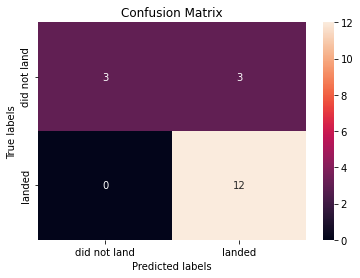

In [19]:
Y_hat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, Y_hat)

In [20]:
params = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
          'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
          'p': [1,2]}

KNN = KNeighborsClassifier()

In [21]:
KNN_cv = GridSearchCV(KNN, params, cv = 10)
KNN_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [22]:
print('tuned hyperparameters (best) : ', KNN_cv.best_params_)
print('accuracy: ', round(KNN_cv.best_score_, 3))

tuned hyperparameters (best) :  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy:  0.848


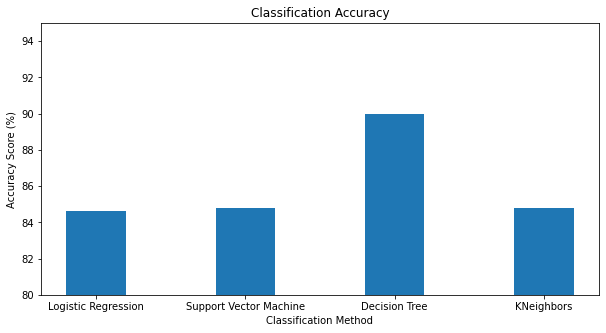

In [23]:
# bar chart displaying accuracy of each classification method

data = {'Logistic Regression': 100*round(logreg_cv.best_score_, 3), 
       'Support Vector Machine': 100*round(SVM_cv.best_score_, 3),
       'Decision Tree': 100*round(tree_cv.best_score_, 3),
       'KNeighbors': 100*round(KNN_cv.best_score_, 3)}

classifiers = list(data.keys())
accuracy = list(data.values())

fig = plt.figure(figsize = (10,5))
plt.bar(classifiers, accuracy, width = 0.4)

plt.ylim(bottom=80, top=95)
plt.xlabel('Classification Method')
plt.ylabel('Accuracy Score (%)')
plt.title('Classification Accuracy')
plt.show()